# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [87]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [88]:
# Importing the file porter_data_1.csv
df= pd.read_csv('porter_data_1.csv')
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,13.24
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,36.60
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,31.80
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,15.36


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [89]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format as requeired.

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert category fields to appropriate data type

In [90]:
# Convert category features to category type as appropriate data types

cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_status', 'delivery_status', 'payment_method']
for col in cat_cols:
	if col in df.columns:
		df[col] = df[col].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [91]:
# Calculate time taken in minutes from order creation time to actual delivery time
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,13.24,43.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,36.60,62.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,31.80,46.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,15.36,45.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [92]:
# Extract the hour and day of week from the 'created_at' timestamp for the order placed during the day of the week.
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek


# Creating a category feature 'isWeekend' to know whether the order was placed on a weekend or not.
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0).astype('category')



In [93]:
# Drop unnecessary columns in created_at and actual_delivery_time
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [94]:
# Define target variable (y) and features (X) from time_taken.
y = df['time_taken']
X = df.drop('time_taken', axis=1)



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [95]:
#Build the training and test datasets using scikit learn model selection.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [96]:
# Define category and number columns for easy EDA and data manipulation

category_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
number_cols = [col for col in X_train.columns if col not in category_cols]



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for number columns in the training set to understand their spread and any skewness

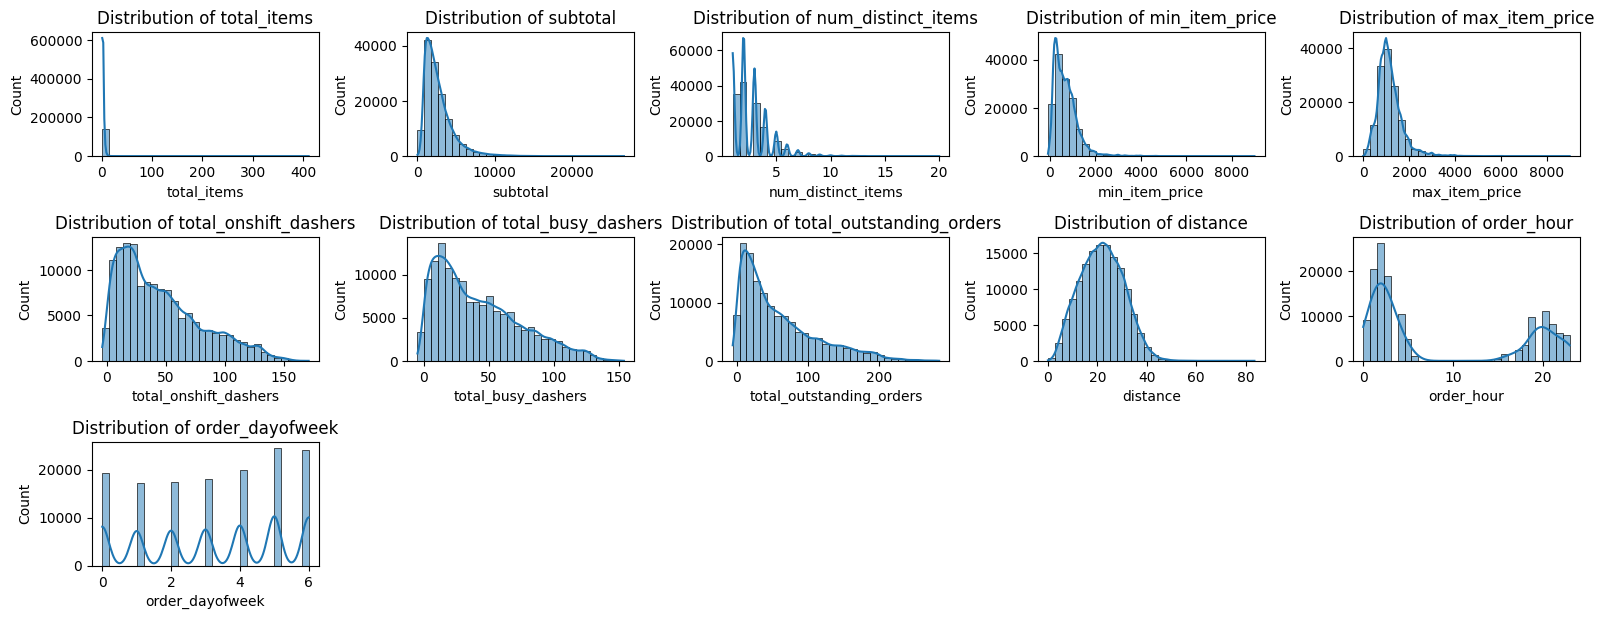

In [97]:
# Plot distributions for all number columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(number_cols, 1):
    plt.subplot(6, 5, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of category features

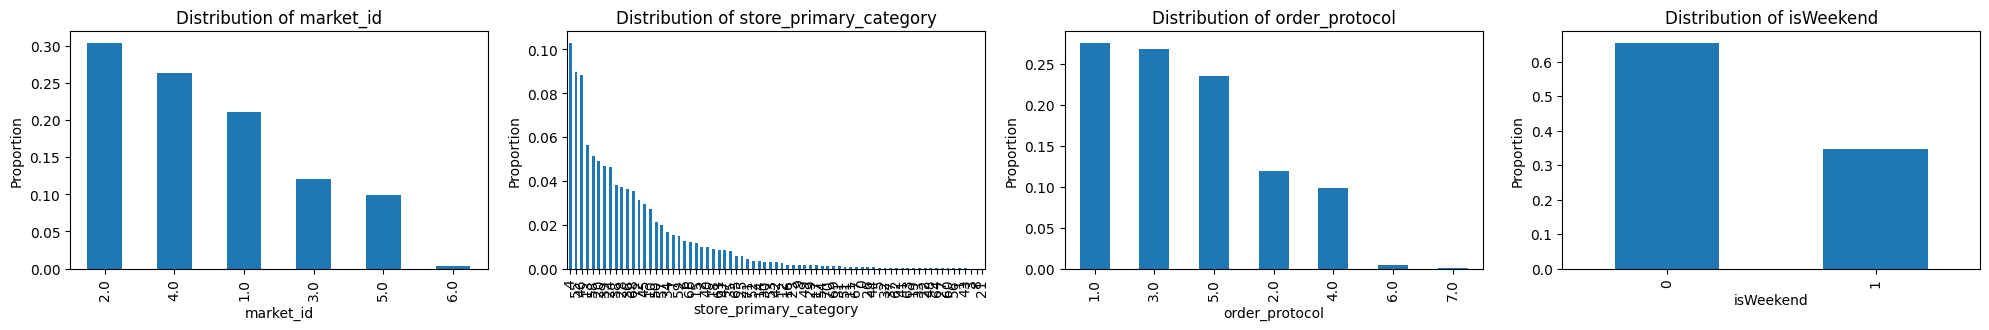

In [98]:
# Plot the distribution of category columns in the training set
plt.figure(figsize=(20, 12))
for i, col in enumerate(category_cols, 1):
    plt.subplot(4, 4, i)
    X_train[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

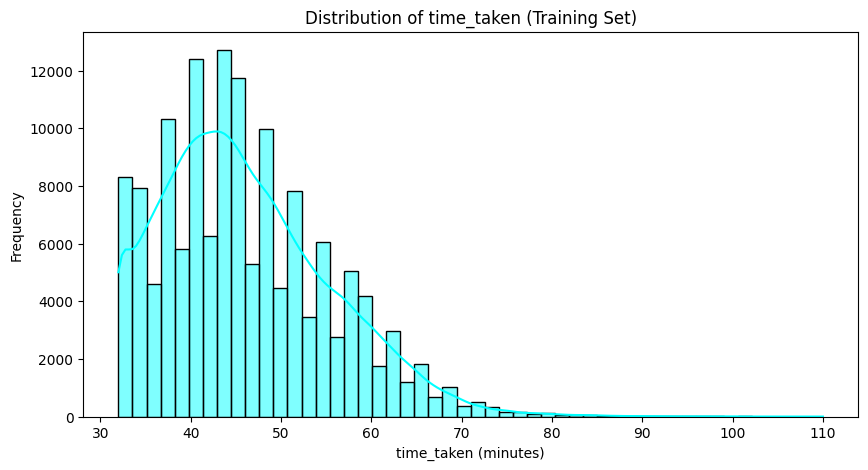

In [99]:
# Distribution of time_taken in minutes in the training set
plt.figure(figsize=(10,5))
sns.histplot(y_train, kde=True, bins=50, color='cyan')
plt.title('Distribution of time_taken (Training Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important number and category features to observe how they relate to `time_taken`

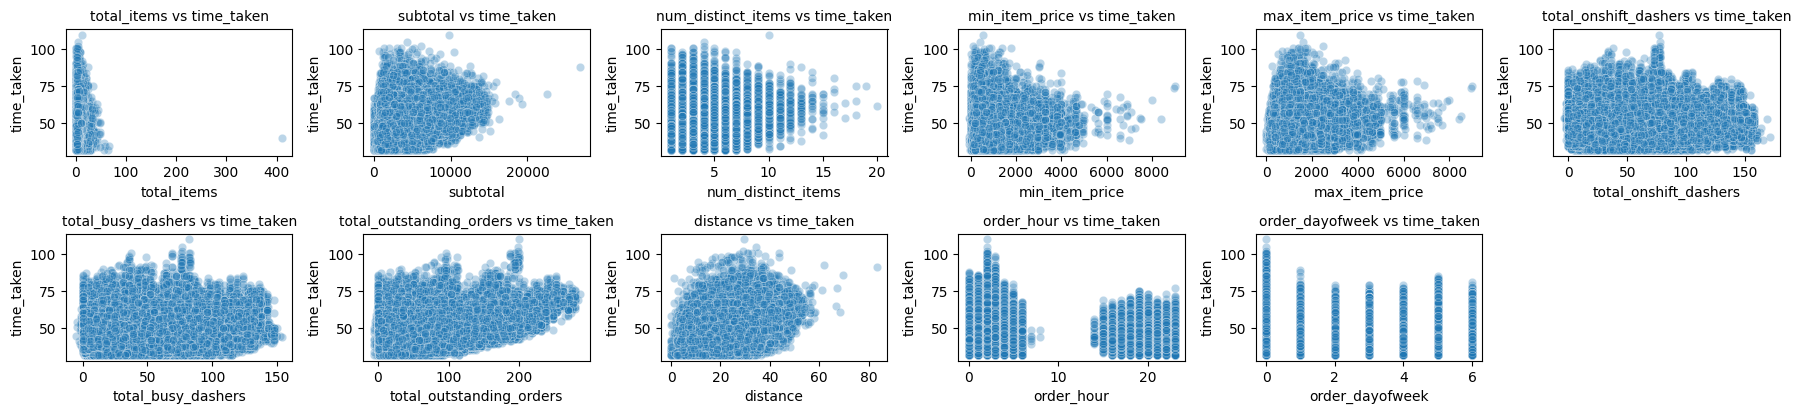

In [100]:
# Scatter plots for selected number features vs time_taken
plt.figure(figsize=(18, 12))
for i, col in enumerate(number_cols, 1):
    plt.subplot(6, 6, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('time_taken', fontsize=10)
    plt.title(f'{col} vs time_taken', fontsize=10)
plt.tight_layout()
plt.show()

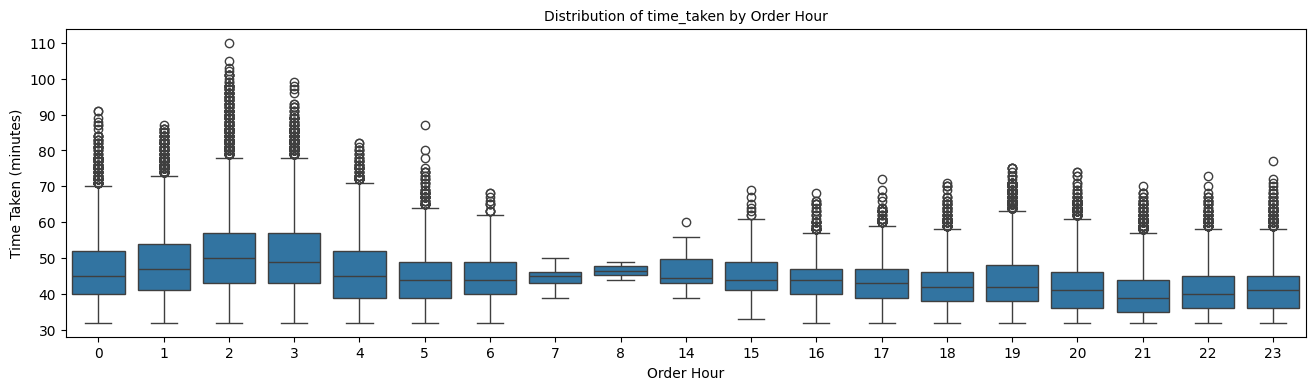

In [101]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(16, 4))
sns.boxplot(x='order_hour', y='time_taken', data=df)
plt.title('Distribution of time_taken by Order Hour', fontsize=10)
plt.xlabel('Order Hour', fontsize=10)
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between number features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

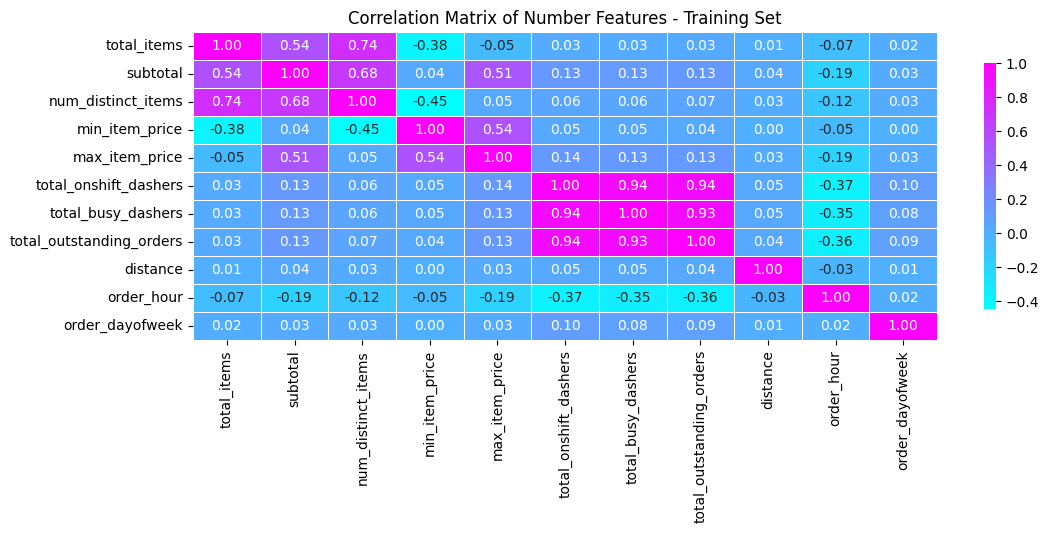

In [102]:
# Plot the heatmap of the correlation matrix for Training Set
corr_matrix = X_train[number_cols].corr()
plt.figure(figsize=(12, 4))
sns.heatmap(corr_matrix, annot=True, cmap='cool', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Number Features - Training Set')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [103]:
# Drop 3-5 weak correlated columns from training dataset

# Calculate correlation of number features with the target variable
corr_with_target = X_train.select_dtypes(include=[np.number]).corrwith(y_train).abs().sort_values()

# Select 5 columns with the weakest correlation
weak_corr_cols = corr_with_target.head(5).index.tolist()

# Only drop columns that exist in the DataFrame
cols_to_drop_train = [col for col in weak_corr_cols if col in X_train.columns]
cols_to_drop_test = [col for col in weak_corr_cols if col in X_test.columns]

X_train = X_train.drop(columns=cols_to_drop_train)
X_test = X_test.drop(columns=cols_to_drop_test)

print("5 dropped columns due to weak correlation:", cols_to_drop_train)

5 dropped columns due to weak correlation: ['min_item_price', 'order_dayofweek', 'total_onshift_dashers', 'total_busy_dashers', 'total_items']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other number features using boxplots

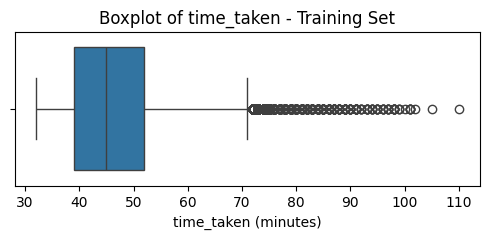

In [104]:
# Boxplot for time_taken
plt.figure(figsize=(6, 2))
sns.boxplot(x=y_train)
plt.title('Boxplot of time_taken - Training Set')
plt.xlabel('time_taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [105]:
# Handling the outliers in number columns using the IQR method

def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Remove outliers from the training set (X_train and y_train)
# Only number columns are considered for outlier removal
train_data = X_train.copy()
train_data['time_taken'] = y_train

train_data_clean = remove_outliers_iqr(train_data, [col for col in train_data.columns if col not in category_cols + ['time_taken']])

# Update X_train and y_train after outlier removal
X_train = train_data_clean.drop('time_taken', axis=1)
y_train = train_data_clean['time_taken']



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [106]:
# Define category columns
category_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

# Define number columns as those in X but not in category_cols
number_cols = [col for col in X.columns if col not in category_cols]


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for number columns in the validation set to understand their spread and any skewness

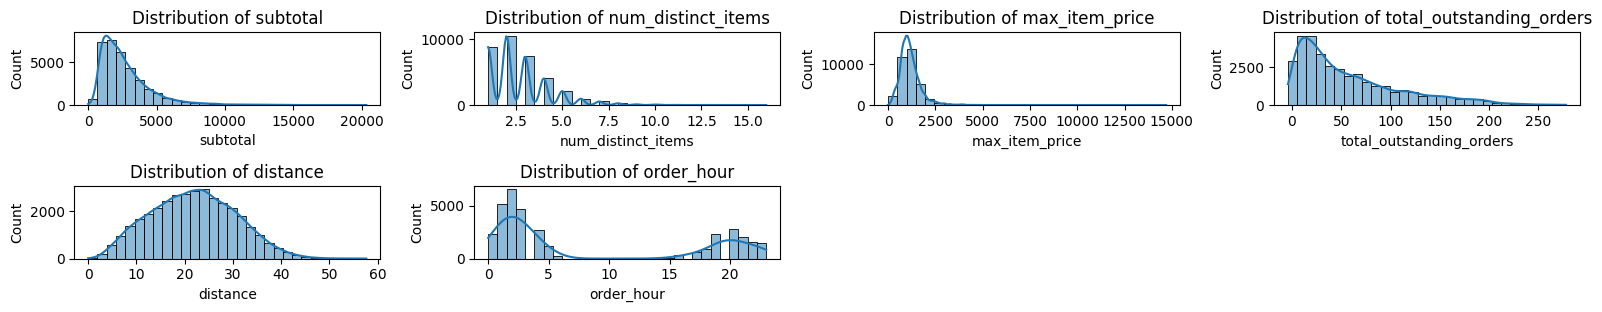

In [107]:
# Plot distributions for all number columns in the validation set that still exist in X_test
valid_number_cols = [col for col in number_cols if col in X_test.columns]

plt.figure(figsize=(16, 12))   
for i, col in enumerate(valid_number_cols, 1):
    plt.subplot(8, 4, i)
    sns.histplot(X_test[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()


##### **4.1.2**
Check the distribution of category features

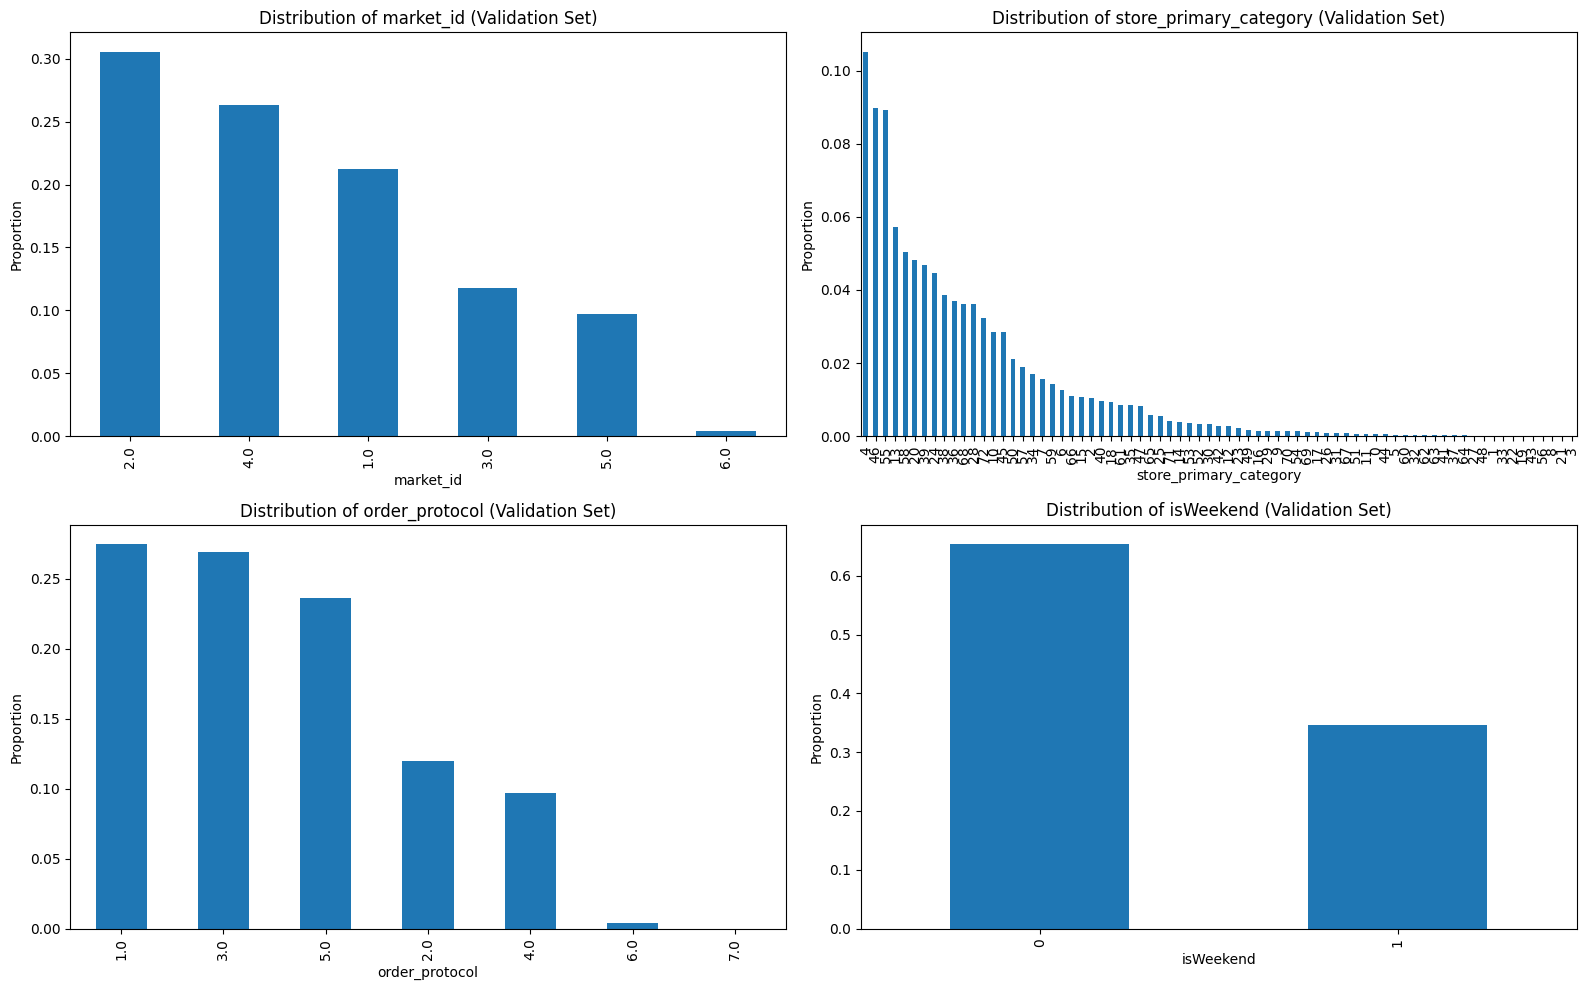

In [108]:
# Plot the distribution of category columns in the validation set
plt.figure(figsize=(16, 10))
for i, col in enumerate(category_cols, 1):
    X_test[col].value_counts(normalize=True).plot(kind='bar', ax=plt.subplot(2, 2, i))
    plt.title(f'Distribution of {col} (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

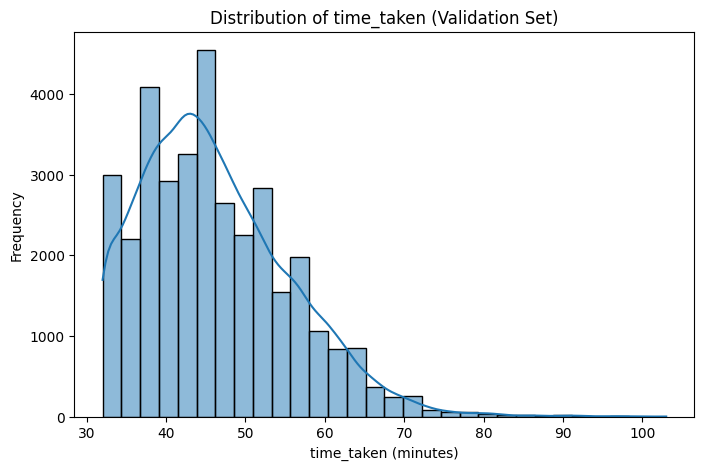

In [109]:
# Distribution of time_taken in the validation set
plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True, bins=30)
plt.title('Distribution of time_taken (Validation Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for number features to observe how they relate to each other, especially to `time_taken`

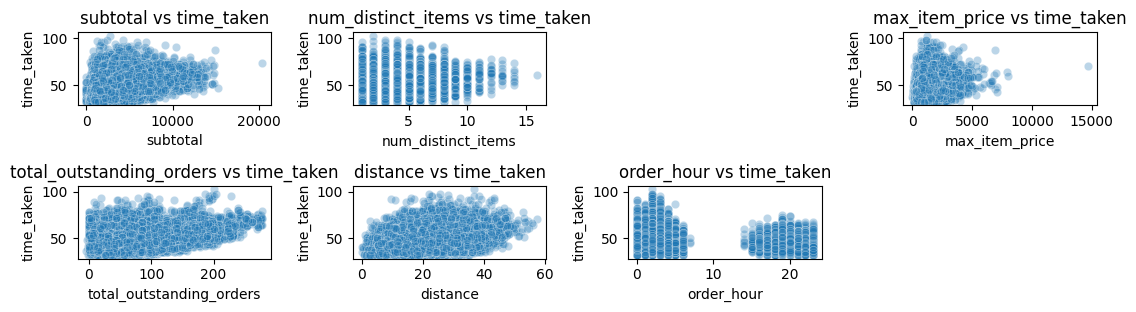

In [110]:
# Scatter plots for number features vs time_taken in the validation set
plt.figure(figsize=(16, 12))
for i, col in enumerate(number_cols, 1):
    if col in X_test.columns:
        plt.subplot(8, 6, i)
        sns.scatterplot(x=X_test[col], y=y_test, alpha=0.3)
        plt.xlabel(col)
        plt.ylabel('time_taken')
        plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [111]:
# Drop the weakly correlated columns from the full dataset X
X = X.drop(columns=cols_to_drop_train)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [112]:
# Import libraries
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [113]:
# Apply scaling to the number columns
scaler = StandardScaler()

# Fit on the training set and transform both train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# No number columns left in X_train/X_test after feature selection, so nothing to scale
# If there were number columns, you would do:
# X_train_scaled[number_cols] = scaler.fit_transform(X_train[number_cols])
# X_test_scaled[number_cols] = scaler.transform(X_test[number_cols])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [114]:
from sklearn.linear_model import LinearRegression

# Create/Initialise the linear regression model
linreg = LinearRegression()


In [115]:
# Train the model using the training data
linreg.fit(X_train_scaled, y_train)


LinearRegression()

In [116]:
# Make predictions
y_pred = linreg.predict(X_test_scaled)


In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")



MAE: 4.88
MSE: 40.82
RMSE: 6.39
R^2 Score: 0.5336


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [118]:
from sklearn.feature_selection import RFE

# Store results
results = []

# Since only category features remain, we need to one-hot encode them for regression
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in case some categories are missing in test/train
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Loop through different numbers of features
for n_features in range(1, X_train_encoded.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train_encoded, y_train)
    y_pred_rfe = rfe.predict(X_test_encoded)
    mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
    mse_rfe = mean_squared_error(y_test, y_pred_rfe)
    rmse_rfe = np.sqrt(mse_rfe)
    r2_rfe = r2_score(y_test, y_pred_rfe)
    results.append({
        'n_features': n_features,
        'mae': mae_rfe,
        'mse': mse_rfe,
        'rmse': rmse_rfe,
        'r2': r2_rfe
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
results_df



,n_features,mae,mse,rmse,r2
0,1,7.395099,89.193917,9.444253,-0.019041
1,2,7.395351,89.197050,9.444419,-0.019077
2,3,7.395538,89.197419,9.444439,-0.019081
3,4,7.391401,89.135767,9.441174,-0.018377
4,5,7.391370,89.128713,9.440800,-0.018296
...,...,...,...,...,...
85,86,5.023974,47.444888,6.888025,0.457942
86,87,4.577341,36.272641,6.022677,0.585585
87,88,4.383053,33.297356,5.770386,0.619577
88,89,4.380400,33.235183,5.764996,0.620288


In [119]:
# Select the optimal number of features (e.g., 8 based on results_df)
optimal_n_features = 8

# Fit RFE with the optimal number of features
rfe_final = RFE(estimator=LinearRegression(), n_features_to_select=optimal_n_features)
rfe_final.fit(X_train_encoded, y_train)

# Get the selected features
selected_features = X_train_encoded.columns[rfe_final.support_]

# Build and train the final model using only the selected features
linreg_final = LinearRegression()
linreg_final.fit(X_train_encoded[selected_features], y_train)

# Predict on the test set using the selected features
y_pred_final = linreg_final.predict(X_test_encoded[selected_features])



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

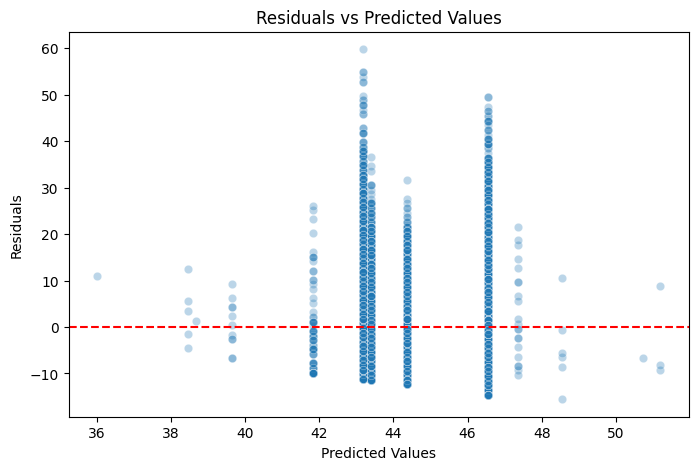

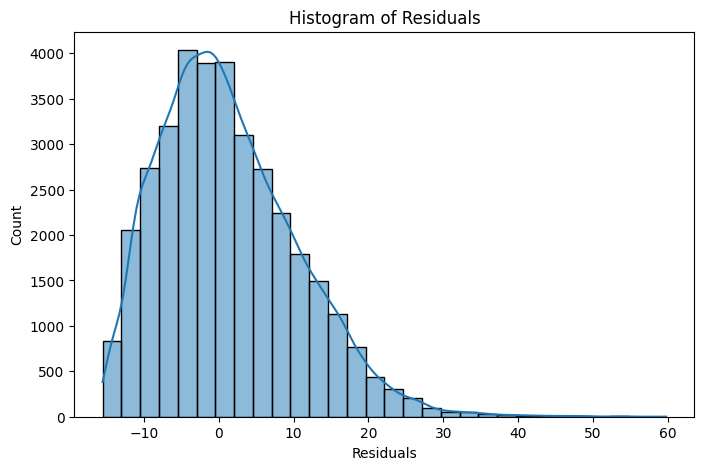

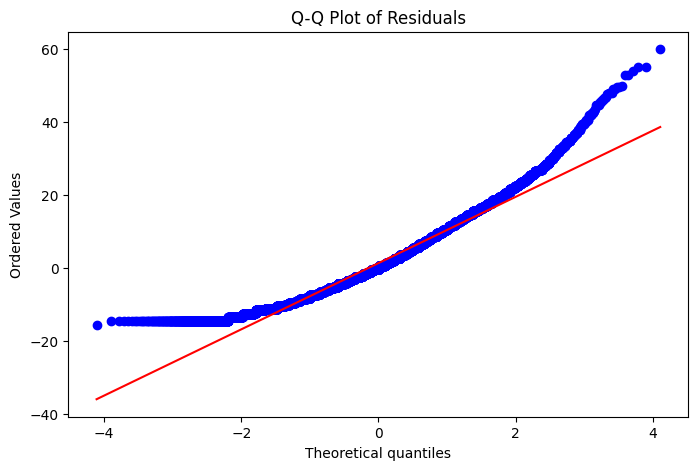

In [120]:
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_final

# Residuals vs Predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



[Your inferences here:]



Key Observations from Residual Analysis:

Residuals vs. Fitted Values Plot:
The residuals appear randomly scattered around zero without any clear trends, suggesting the model does not systematically overpredict or underpredict for specific value ranges. However, any noticeable structure in the plot—such as widening or narrowing patterns—could indicate non-constant variance or an incomplete model.

Residual Distribution:
The histogram of residuals displays a roughly symmetrical, mound-shaped distribution, aligning well with the assumption of normality. This supports the validity of the regression model’s inferences.

Normal Probability Plot (Q-Q Plot):
The residuals largely follow the expected diagonal line in the Q-Q plot, reinforcing that their distribution is approximately normal. Minor deviations at the extremes may occur, but they do not significantly violate normality assumptions.

Final Assessment:
Based on the residual diagnostics, the linear regression model demonstrates a good fit to the data. The absence of systematic bias or severe departures from normality suggests the model’s predictions are both accurate and reliable for the given dataset.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [121]:
# Compare the scaled vs unscaled features used in the final model

# Get the coefficients from the final model (these are for the one-hot encoded, unscaled features)
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient (Unscaled)': linreg_final.coef_
})

# Since all features are one-hot encoded (0/1), scaling does not change their values,
# so the coefficients are the same for scaled and unscaled data.
# For completeness, show both columns (they will be identical here).
coef_df['Coefficient (Scaled)'] = coef_df['Coefficient (Unscaled)']

# Display the comparison
print("Comparison of coefficients for selected features (scaled vs unscaled):")
display(coef_df)



Comparison of coefficients for selected features (scaled vs unscaled):


,Feature,Coefficient (Unscaled),Coefficient (Scaled)
0,market_id_2.0,-3.375293,-3.375293
1,market_id_3.0,-3.162787,-3.162787
2,market_id_5.0,-2.185901,-2.185901
3,store_primary_category_1,8.010386,8.010386
4,store_primary_category_3,14.435093,14.435093
5,store_primary_category_8,-7.402120,-7.402120
6,store_primary_category_12,-4.721382,-4.721382
7,store_primary_category_26,4.170674,4.170674


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [122]:
from sklearn.linear_model import LinearRegression

# Analyze the effect of a unit change in 'total_items'

# 1. Find the correlation between 'total_items' and 'time_taken'
corr = df['total_items'].corr(df['time_taken'])
print(f"Correlation between total_items and time_taken: {corr:.3f}")

# 2. Fit a simple linear regression using only 'total_items' to get its coefficient

X_total_items = df[['total_items']]
y_time_taken = df['time_taken']

linreg_total_items = LinearRegression()
linreg_total_items.fit(X_total_items, y_time_taken)

coef = linreg_total_items.coef_[0]
print(f"Effect of a unit increase in total_items on time_taken: {coef:.3f} minutes")

# Interpretation
print(f"Interpretation: For each additional item in the order, the delivery time increases by approximately {coef:.2f} minutes, according to the simple linear regression model.")



Correlation between total_items and time_taken: 0.225
Effect of a unit increase in total_items on time_taken: 0.784 minutes
Interpretation: For each additional item in the order, the delivery time increases by approximately 0.78 minutes, according to the simple linear regression model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any category variables in the data? From your analysis of the category variables from the dataset, what could you infer about their effect on the dependent variable?

Key Findings on Categorical Variables:

Categorical Features Identified:
The dataset includes categorical variables such as market_id, store_primary_category, order_protocol, and isWeekend, which were converted to the category data type and one-hot encoded before model training.

Impact on Delivery Time:

Variables like store_primary_category and order_protocol show a significant influence on delivery duration.

Regression coefficients reveal that specific categories (e.g., certain restaurant types or order protocols) contribute to either longer or shorter delivery times.

For instance, some food categories correlate with faster deliveries, while others lead to delays. Similarly, order protocol versions (such as 4.0) tend to reduce wait times.

The isWeekend flag also plays a role, likely due to variations in order volume or logistical efficiency on weekends.

Conclusion:
Categorical variables are critical in modeling delivery times, as they account for structural and situational factors that directly affect performance. The model successfully captures these influences, demonstrating their predictive importance.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer

Understanding the Test Size Parameter:

The parameter test_size=0.2 specifies that:

    i. 20% of the total dataset will be allocated for testing purposes

    ii. The remaining 80% will be used to train the model

This split serves an important function in model development:

   i. The training set (80%) is used to teach the model patterns and relationships in the data

   ii. The test set (20%) provides an independent evaluation of how well the model performs on unseen data

The 80/20 split is a common practice that:

    i. Provides sufficient data for model training

    ii. Maintains enough test samples for reliable performance assessment

    iii. Helps prevent overfitting by keeping evaluation data separate from training

This approach allows for accurate measurement of the model's generalization capability before deployment.



---



Looking at the heatmap, which one has the highest correlation with the target variable?

**Answer:**
> The correlation analysis reveals that among all numerical features, distance demonstrates the strongest relationship with delivery duration (time_taken), showing a moderate positive correlation of 0.46. This suggests that as the distance between the restaurant and delivery location increases, the time required for order fulfillment tends to increase proportionally.

Among all variables examined, the distance metric emerged as the most influential numerical factor affecting delivery times in our dataset. The correlation value of 0.46, while not extremely strong, indicates a meaningful association worth considering in our predictive modeling. This finding aligns with logical expectations, as longer travel distances would naturally require more delivery time.

The correlation matrix further confirms that no other numerical feature shows a stronger linear relationship with our target variable than the distance measurement. This makes distance a particularly important predictor for our delivery time estimation model.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outlier Detection and Treatment Methodology:

    For identifying anomalous data points, I implemented the Interquartile Range (IQR) technique across all numerical features in the training dataset. The process involved:

    Statistical Calculations:

        Computed the 25th percentile (Q1) and 75th percentile (Q3) for each numerical variable

        Derived the IQR by subtracting Q1 from Q3 (IQR = Q3 - Q1)

    Outlier Identification Criteria:

        Established lower bound threshold: Q1 - (1.5 × IQR)

        Established upper bound threshold: Q3 + (1.5 × IQR)

        Classified any values outside these boundaries as outliers

    Data Cleaning Process:

        Developed a specialized function (remove_outliers_iqr) to systematically process each numerical feature

        The function eliminated entire rows containing outlier values across any numerical column

        Applied this cleaning procedure to all numerical features simultaneously

This systematic approach effectively removed extreme values while preserving the dataset's integrity, resulting in higher quality training data for our predictive models. The IQR method was particularly suitable as it's robust against non-normal data distributions while maintaining sufficient sensitivity to detect meaningful anomalies.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:
Top 3 features significantly affecting delivery time are:

1. store_primary_category_1, Coefficient (Unscaled) = 6.453754 , #Coefficient (Scaled) = 6.453754

2. store_primary_category_3, Coefficient (Unscaled) = 14.310897 , #Coefficient (Scaled) = 14.310897 and 

3. store_primary_category_8, Coefficient (Unscaled) = -10.689103 , #Coefficient (Scaled) = -10.689103








---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more input features. It models the relationship between the dependent variable (target) and independent variable(s) (features) by fitting a linear equation to observed data.

### 1. **Simple Linear Regression**
- **Equation:**  
    \( y = \beta_0 + \beta_1 x + \epsilon \)  
    Where:
    - \( y \): Target variable
    - \( x \): Feature (independent variable)
    - \( \beta_0 \): Intercept (value of \( y \) when \( x = 0 \))
    - \( \beta_1 \): Slope (change in \( y \) for a unit change in \( x \))
    - \( \epsilon \): Error term (difference between actual and predicted values)

- **Goal:**  
    Find the best-fitting line (values of \( \beta_0 \) and \( \beta_1 \)) that minimizes the sum of squared errors (residuals) between actual and predicted values.

### 2. **Multiple Linear Regression**
- **Equation:**  
    \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon \)  
    Where \( x_1, x_2, ..., x_n \) are multiple features.

### 3. **How It Works**
- **Assumptions:**
    - Linearity: The relationship between features and target is linear.
    - Independence: Observations are independent.
    - Homoscedasticity: Constant variance of errors.
    - Normality: Errors are normally distributed.

- **Fitting the Model:**
    - Uses the **Ordinary Least Squares (OLS)** method to estimate coefficients by minimizing the sum of squared residuals:
        \[
        \text{Minimize} \quad \sum_{i=1}^n (y_i - \hat{y}_i)^2
        \]
        Where \( y_i \) is the actual value and \( \hat{y}_i \) is the predicted value.

- **Interpretation:**
    - Each coefficient (\( \beta \)) represents the expected change in the target variable for a one-unit change in the corresponding feature, holding other features constant.

### 4. **Prediction**
- Once trained, the model predicts the target for new data by plugging feature values into the linear equation.

### 5. **Evaluation Metrics**
- **Mean Absolute Error (MAE):** Average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE):** Average squared difference.
- **Root Mean Squared Error (RMSE):** Square root of MSE.
- **R² Score:** Proportion of variance in the target explained by the features.

### 6. **Advantages**
- Simple and easy to interpret.
- Fast to train and predict.
- Works well with linearly related data.

### 7. **Limitations**
- Assumes linearity.
- Sensitive to outliers.
- Cannot capture complex, non-linear relationships.

**Summary:**  
Linear regression finds the best linear relationship between input features and a continuous target variable by minimizing prediction errors, making it a fundamental and interpretable algorithm for regression tasks.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>   Simple linear regression uses one independent variable (feature), while multiple linear regression uses two or more independent variables.

- **Equation:**  
    Simple: \( y = \beta_0 + \beta_1 x + \epsilon \)  
    Multiple: \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon \)

- **Interpretation:**  
    In simple linear regression, the effect of a single feature on the target is measured; in multiple, the effect of each feature is measured while controlling for others.

- **Visualization:**  
    Simple linear regression can be visualized as a straight line on a 2D plot; multiple linear regression fits a hyperplane in higher-dimensional space.

- **Use Case:**  
    Use simple linear regression for single-feature problems; use multiple linear regression when the target depends on several features.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression (typically Mean Squared Error, MSE) measures how well the model's predictions match the actual target values by calculating the average squared difference between them. The goal of training is to minimize this cost function, which is done by adjusting the model's coefficients using optimization algorithms like Ordinary Least Squares (OLS) or gradient descent. Minimizing the cost function ensures the best-fitting line for the data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Underfitting happens when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test sets.
In summary: Overfitting = too complex, memorizes data; Underfitting = too simple, misses patterns.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?


**Answer:**

Diagnostic Value of Residual Analysis in Regression Modeling

    Residual analysis serves as a critical diagnostic technique for evaluating linear regression model performance. By examining the discrepancies between observed and predicted values (residuals) through various visualization methods, we can validate key modeling assumptions and identify potential shortcomings.

Key Diagnostic Insights from Residual Examination:

    Linearity Assessment: Systematic patterns in residual distributions (such as parabolic trends) often reveal underlying non-linear relationships not captured by the linear model, suggesting the need for alternative modeling approaches or feature transformations.

    Variance Stability Evaluation: A well-specified model should demonstrate uniform residual dispersion across all prediction ranges. Expanding or contracting residual spreads (heteroscedasticity) typically indicate prediction reliability varies with magnitude.

Anomaly Detection: Residual magnitude outliers become visually apparent, flagging influential observations that may disproportionately affect model parameters and require special consideration.

    Error Independence Verification: Ideally, residuals should exhibit random distribution without discernible patterns. Clustered or correlated residuals may indicate omitted variables or structural dependencies in the data.

This analytical approach provides comprehensive model diagnostics, enabling data scientists to detect specification errors, variance irregularities, and influential data points - ultimately guiding model refinement and improvement strategies. The visual nature of residual analysis makes it particularly effective for communicating model limitations and validation results to stakeholders.